In [31]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv('Mall_Customers.csv')

In [33]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.shape

(200, 5)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [36]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [37]:
x=df.iloc[:,[3,4]].values

In [38]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Text(0, 0.5, 'Spending score')

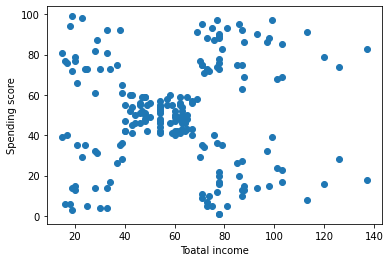

In [39]:
plt.scatter(x[...,0],x[...,1])
plt.xlabel('Toatal income')
plt.ylabel('Spending score')

In [40]:
from sklearn.cluster import KMeans
wks=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,random_state=0)
    kmean.fit(x)
    wks.append(kmean.inertia_)
    

In [41]:
wks

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543]

Text(0, 0.5, 'kmean_intertia')

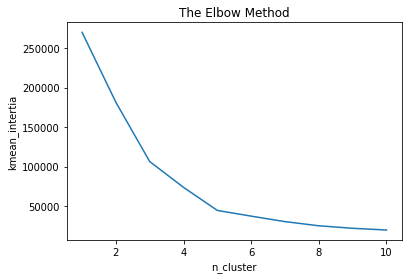

In [42]:
plt.plot(range(1,11),wks)
plt.title('The Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('kmean_intertia')

In [43]:
kmean=KMeans(n_clusters=5,random_state=42)
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [46]:

pred=kmean.predict(x)

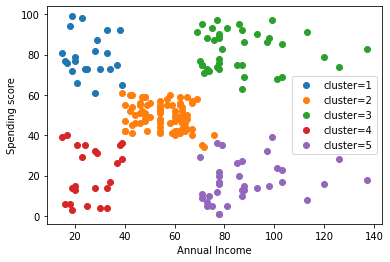

In [50]:
plt.scatter(x[pred==0,0],x[pred==0,1],label='cluster=1')
plt.scatter(x[pred==1,0],x[pred==1,1],label='cluster=2')
plt.scatter(x[pred==2,0],x[pred==2,1],label='cluster=3')
plt.scatter(x[pred==3,0],x[pred==3,1],label='cluster=4')
plt.scatter(x[pred==4,0],x[pred==4,1],label='cluster=5')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()

In [51]:
df['Target']=pred

In [52]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4
